# Benchmarking

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlmc import mlmc  # Assuming this is how you import the function
from tqdm.notebook import tqdm

def benchmark_mlmc(parameter_sets, runs=5):
    """
    Benchmark the mlmc function with different parameter sets.

    Args:
        parameter_sets: List of dictionaries, each containing parameters for mlmc
        runs: Number of times to run each parameter set for averaging

    Returns:
        DataFrame with benchmark results
    """
    results = []

    for params in parameter_sets:
        total_time = 0
        total_cost = 0
        avg_error = 0
        max_levels = []

        solution = params["f"]
        x = params["x"]
        y = params["y"]
        
        for _ in tqdm(range(runs)):
            start_time = time.time()
            expectation, cost, max_level, _ = mlmc(**params)
            end_time = time.time()

            total_time += (end_time - start_time)
            total_cost += cost
            max_levels.append(max_level)
            error = abs(expectation - solution(x, y))
            avg_error += error

        avg_error /= runs
        res = {
            **params,
            'avg_execution_time': total_time / runs,
            'avg_computational_cost': total_cost / runs,
            'avg_max_level': sum(max_levels) / len(max_levels),
            'expectation': expectation,  # Last computed value
            'avg_error': avg_error
        }
        results.append(res)
        print(res)

    return pd.DataFrame(results)

In [4]:
# Example test functions from your notebook
from test_functions import sin, sin_rhs, cos, cos_rhs, sq_cos, sq_cos_rhs
from test_functions import gaussian, gaussian_rhs, exp, exp_rhs
from test_functions import poly, poly_rhs
# Define parameter sets to benchmark
parameter_sets = [
    # Varying epsilon (accuracy)
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.025},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1/(4**2)},

    # Varying dt0 (initial time step)
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.1, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.001, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.0001, 'epsilon': 0.01},

    # Different test functions
    {'x': 0.5, 'y': 0.5, 'f': cos, 'g': cos_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sq_cos, 'g': sq_cos_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': gaussian, 'g': gaussian_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': exp, 'g': exp_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': poly, 'g': poly_rhs, 'dt0': 0.01, 'epsilon': 0.01},


    # Different coordinates
    {'x': 0.25, 'y': 0.75, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.01},
]

# Run benchmarks
benchmark_results = benchmark_mlmc(parameter_sets, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.01, 'epsilon': 0.1, 'avg_execution_time': 1.453930950164795, 'avg_computational_cost': np.float64(265184.5), 'avg_max_level': 4.7, 'expectation': np.float64(1.0935524291430048), 'avg_error': np.float64(0.09160391943348827)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.01, 'epsilon': 0.025, 'avg_execution_time': 4.083849215507508, 'avg_computational_cost': np.float64(1056287.9), 'avg_max_level': 6.7, 'expectation': np.float64(1.0817643922862497), 'avg_error': np.float64(0.07153425963671191)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.01, 'epsilon': 0.00625, 'avg_execution_time': 69.43914420604706, 'avg_computational_cost': np.float64(33578978.1), 'avg_max_level': 10.4, 'expectation': np.float64(1.045090457965471), 'avg_error': np.float64(0.050098281258789526)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.1, 'epsilon': 0.01, 'avg_execution_time': 54.64176678657532, 'avg_computational_cost': np.float64(18532671.5), 'avg_max_level': 13.4, 'expectation': np.float64(2.0905007429479823), 'avg_error': np.float64(1.0933694404831662)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 34.35924665927887, 'avg_computational_cost': np.float64(11917367.7), 'avg_max_level': 9.2, 'expectation': np.float64(1.0736142636097439), 'avg_error': np.float64(0.057005845773676775)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.001, 'epsilon': 0.01, 'avg_execution_time': 22.058521223068237, 'avg_computational_cost': np.float64(9547013.8), 'avg_max_level': 5.1, 'expectation': np.float64(1.0201755032409616), 'avg_error': np.float64(0.018137257881644154)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.0001, 'epsilon': 0.01, 'avg_execution_time': 38.65970757007599, 'avg_computational_cost': np.float64(21411158.7), 'avg_max_level': 3.7, 'expectation': np.float64(1.0104891979888593), 'avg_error': np.float64(0.007540632753914522)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function cos at 0x78ec412c6200>, 'g': <function cos_rhs at 0x78ec412c6340>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 4.913985347747802, 'avg_computational_cost': np.float64(1454659.5), 'avg_max_level': 5.3, 'expectation': np.float64(-0.10925267840812879), 'avg_error': np.float64(0.10484239608232801)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function sq_cos at 0x78ec412c63e0>, 'g': <function sq_cos_rhs at 0x78ec412c6480>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 160.7842711687088, 'avg_computational_cost': np.float64(56933124.7), 'avg_max_level': 8.5, 'expectation': np.float64(-0.9274138302752005), 'avg_error': np.float64(0.9081635000005001)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function gaussian at 0x78ec412c6660>, 'g': <function gaussian_rhs at 0x78ec412c6700>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 22.4026340007782, 'avg_computational_cost': np.float64(10461303.6), 'avg_max_level': 8.7, 'expectation': np.float64(1.0104788621161243), 'avg_error': np.float64(0.011021454812854714)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function exp at 0x78ec412c68e0>, 'g': <function exp_rhs at 0x78ec412c6980>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 47.13911674022675, 'avg_computational_cost': np.float64(25589475.7), 'avg_max_level': 7.7, 'expectation': np.float64(2.6367269755459937), 'avg_error': np.float64(0.07106599464960554)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.5, 'y': 0.5, 'f': <function poly at 0x78ec412c6520>, 'g': <function poly_rhs at 0x78ec412c65c0>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 1.8722548007965087, 'avg_computational_cost': np.float64(679261.7), 'avg_max_level': 4.7, 'expectation': np.float64(0.46628027218665785), 'avg_error': np.float64(0.04263102735292841)}


  0%|          | 0/10 [00:00<?, ?it/s]

{'x': 0.25, 'y': 0.75, 'f': <function sin at 0x78ec415af600>, 'g': <function sin_rhs at 0x78ec412c6020>, 'dt0': 0.01, 'epsilon': 0.01, 'avg_execution_time': 14.470255589485168, 'avg_computational_cost': np.float64(5244460.2), 'avg_max_level': 8.4, 'expectation': np.float64(0.5608703061600712), 'avg_error': np.float64(0.05860215418511159)}


       x     y                                      f  \
0   0.50  0.50       <function sin at 0x78ec415af600>   
1   0.50  0.50       <function sin at 0x78ec415af600>   
2   0.50  0.50       <function sin at 0x78ec415af600>   
3   0.50  0.50       <function sin at 0x78ec415af600>   
4   0.50  0.50       <function sin at 0x78ec415af600>   
5   0.50  0.50       <function sin at 0x78ec415af600>   
6   0.50  0.50       <function sin at 0x78ec415af600>   
7   0.50  0.50       <function cos at 0x78ec412c6200>   
8   0.50  0.50    <function sq_cos at 0x78ec412c63e0>   
9   0.50  0.50  <function gaussian at 0x78ec412c6660>   
10  0.50  0.50       <function exp at 0x78ec412c68e0>   
11  0.50  0.50      <function poly at 0x78ec412c6520>   
12  0.25  0.75       <function sin at 0x78ec415af600>   

                                            g     dt0  epsilon  \
0        <function sin_rhs at 0x78ec412c6020>  0.0100  0.10000   
1        <function sin_rhs at 0x78ec412c6020>  0.0100  0.02500   
2  

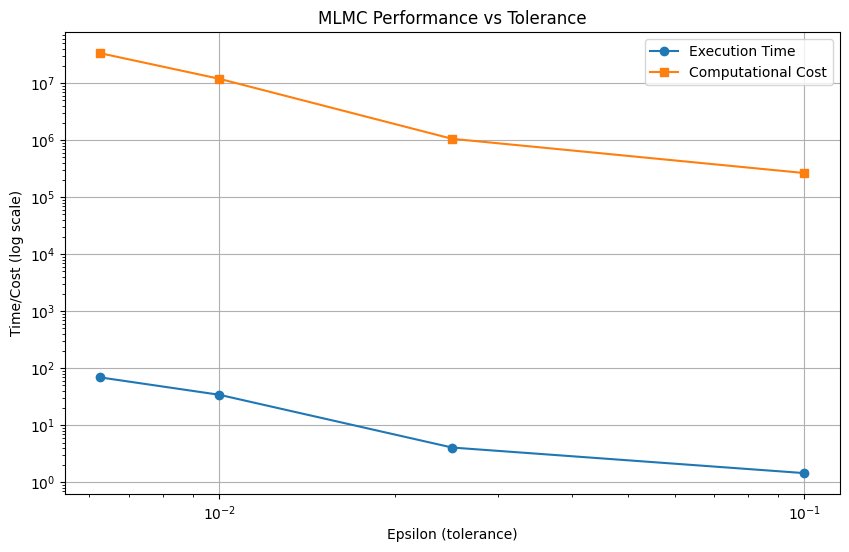

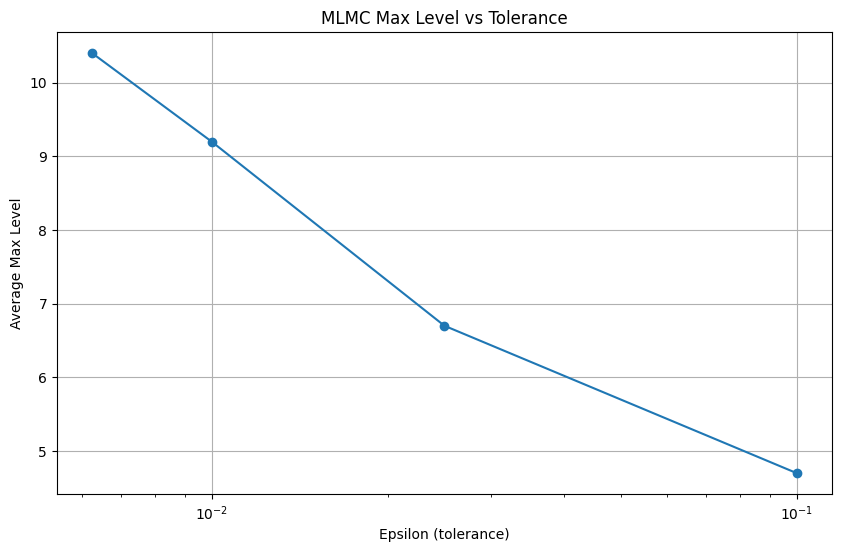

In [5]:

# Display results table
print(benchmark_results)

# Plot execution time vs epsilon
plt.figure(figsize=(10, 6))
epsilon_results = benchmark_results[benchmark_results['x'] == 0.5]
epsilon_results = epsilon_results[epsilon_results['dt0'] == 0.01]
epsilon_results = epsilon_results[epsilon_results['f'] == sin]
epsilon_results = epsilon_results.sort_values('epsilon')

plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_execution_time'], 'o-', label='Execution Time')
plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_computational_cost'], 's-', label='Computational Cost')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Time/Cost (log scale)')
plt.title('MLMC Performance vs Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Plot max level vs epsilon
plt.figure(figsize=(10, 6))
plt.semilogx(epsilon_results['epsilon'], epsilon_results['avg_max_level'], 'o-')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Average Max Level')
plt.title('MLMC Max Level vs Tolerance')
plt.grid(True)
plt.show()

[np.float64(34.35924665927887), np.float64(4.913985347747802), np.float64(160.7842711687088), np.float64(1.8722548007965087), np.float64(22.4026340007782), np.float64(47.13911674022675)]


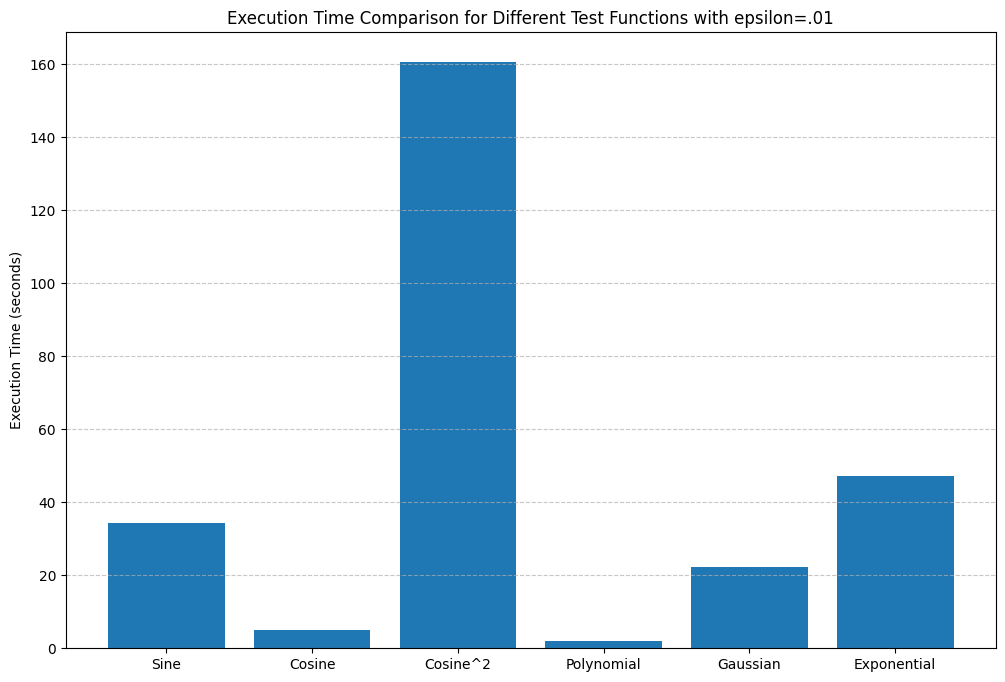

In [9]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_execution_time'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Execution Time Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("time_comparison.png")

[np.float64(11917367.7), np.float64(1454659.5), np.float64(56933124.7), np.float64(679261.7), np.float64(10461303.6), np.float64(25589475.7)]


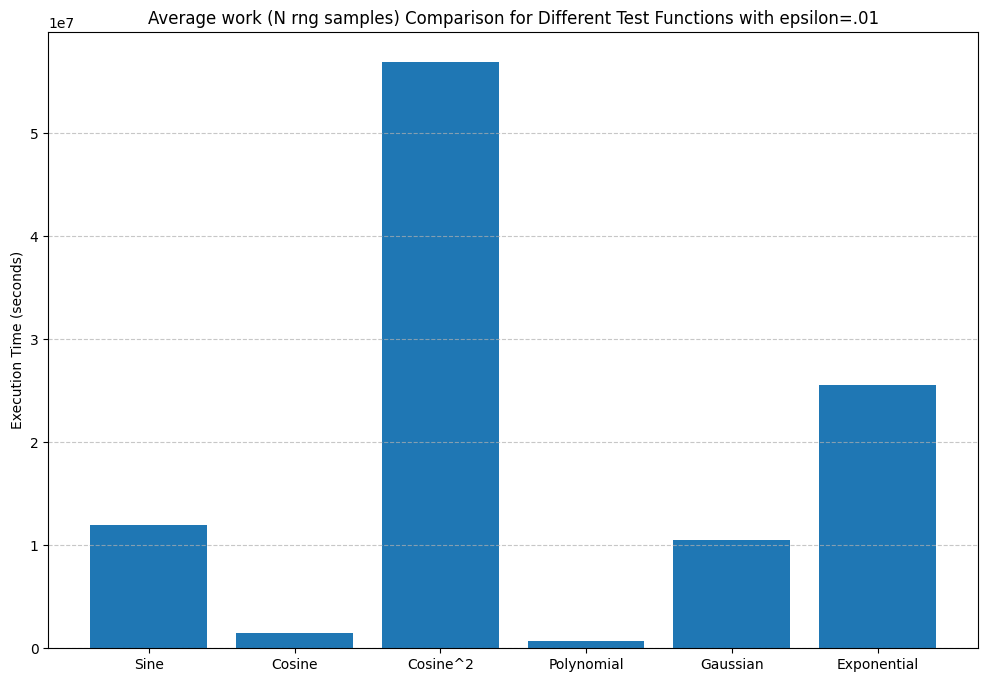

In [8]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_computational_cost'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Average work (N rng samples) Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("work_comparison.png")

[28.79410846 26.07750779 24.42072805 29.97619631]
[0.1    0.01   0.001  0.0001]


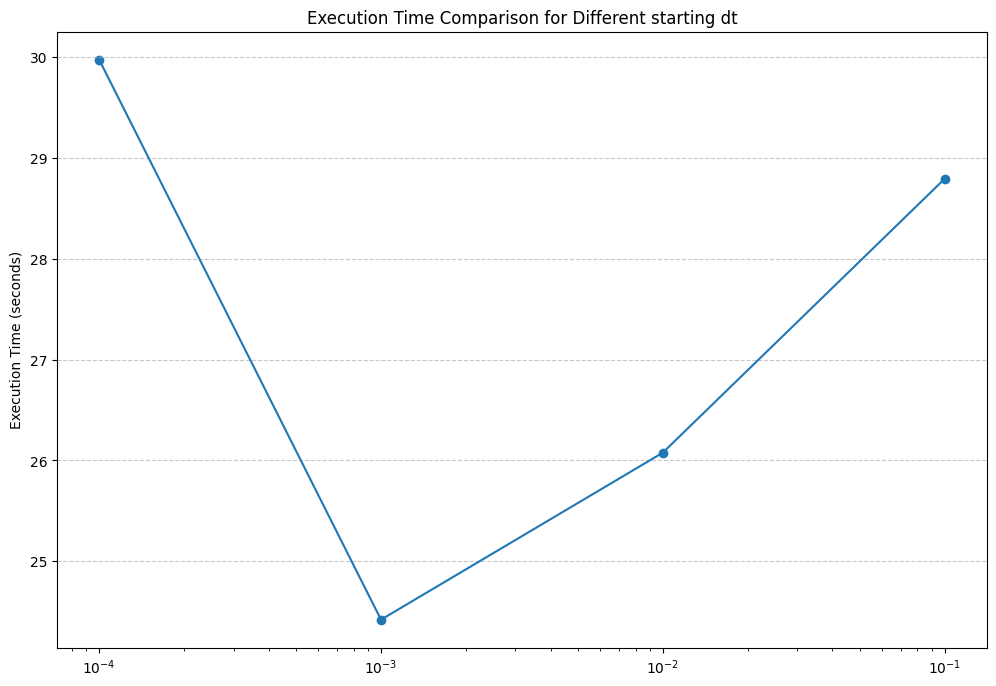

In [9]:

dt_result = benchmark_results
dt_result = benchmark_results[benchmark_results['x'] == 0.5]
dt_result = dt_result[dt_result['f'] == sin]
dt_result = dt_result[dt_result['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = dt_result['avg_execution_time'].values
print(times)
dts = dt_result['dt0'].values
print(dts)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.semilogx(
    dts,
    times
)
plt.scatter(dts, times)
plt.title('Execution Time Comparison for Different starting dt')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("time_comp_dt.png")

[np.float64(0.012434182050266663), np.float64(0.00665413760915058), np.float64(0.010794098963253524), np.float64(0.015106996772647149), np.float64(0.008652054754757794), np.float64(0.01867016610544725)]


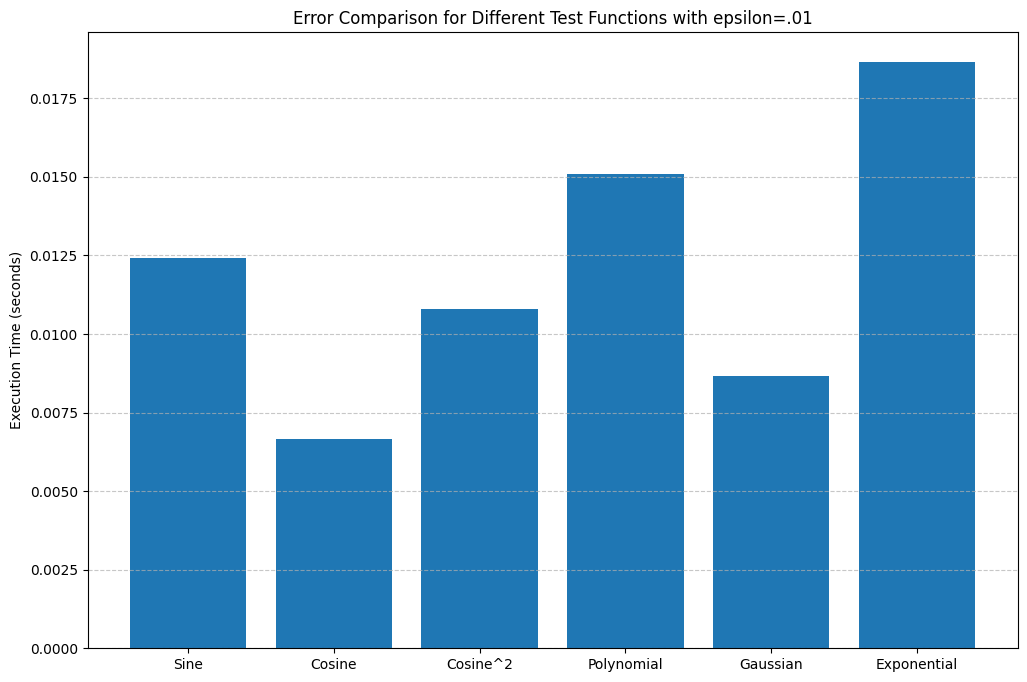

In [10]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_error'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Error Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("error_comp.png")

In [ ]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == 0.01]
function_results = function_results[function_results['epsilon'] == 0.01]

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}

times = [function_results[function_results['f'] == func]['avg_error'].values[0] for func in test_functions.values()]
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    list(test_functions.keys()),
    times
)

plt.title('Error Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)